In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/impact-of-ai-on-digital-media-2020-2025/Global_AI_Content_Impact_Dataset.csv


## 📊 Exploratory Data Analysis (EDA) Setup

We begin by importing essential libraries for data analysis and visualization:

- **pandas**: For handling and manipulating tabular data
- **matplotlib.pyplot**: For creating static, interactive, and animated visualizations
- **seaborn**: For beautiful statistical plots
- **warnings**: To suppress unnecessary warning messages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/impact-of-ai-on-digital-media-2020-2025/Global_AI_Content_Impact_Dataset.csv")

In [4]:
df.shape

(200, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null    object 
 10  Consumer Trust

In [6]:
df.head()

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


In [7]:
df.describe()

,Year,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Consumer Trust in AI (%),Market Share of AI Companies (%)
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2022.315000,54.265850,46.07260,25.788250,39.719450,54.102150,59.425150,26.569550
std,1.825496,24.218067,29.16122,13.901105,23.829545,19.247079,17.319668,14.023729
min,2020.000000,10.530000,1.04000,0.090000,0.140000,20.210000,30.120000,1.180000
25%,2021.000000,33.222500,20.32250,14.995000,17.907500,37.770000,44.755000,14.052500
50%,2022.000000,53.310000,44.32000,25.735000,42.100000,54.515000,59.215000,27.390000
75%,2024.000000,76.220000,71.62000,37.417500,58.697500,69.402500,74.885000,38.432500
max,2025.000000,94.760000,99.06000,49.710000,79.550000,88.290000,89.880000,49.280000


# Country-wise AI Adoption

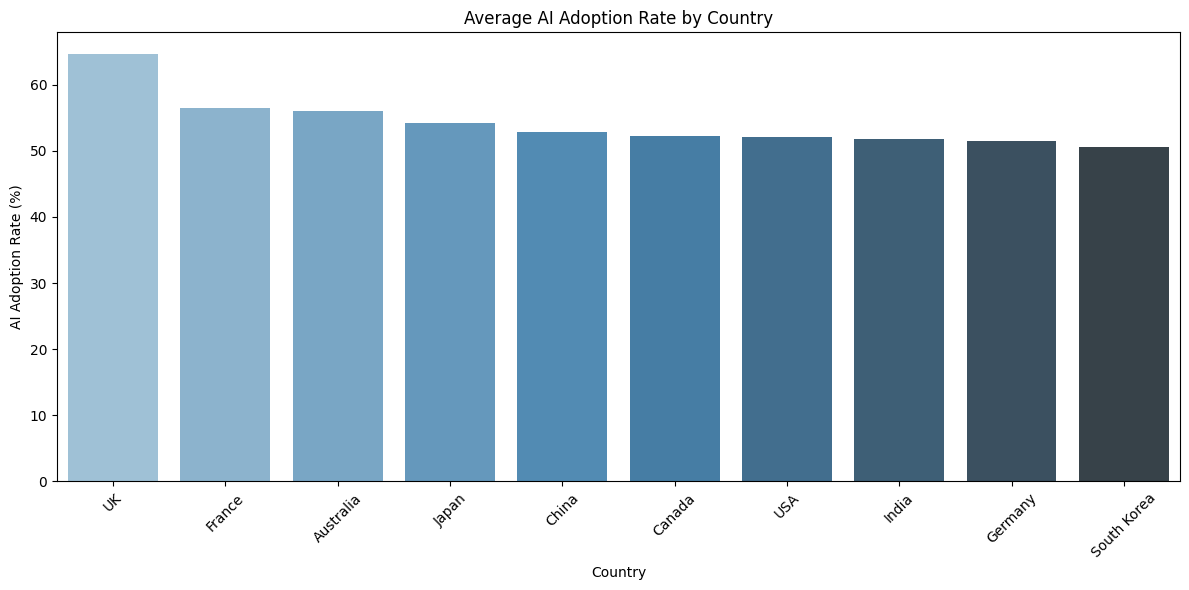

In [8]:
country_group_sorted = df.groupby('Country').mean(numeric_only=True).sort_values(by='AI Adoption Rate (%)', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_group_sorted.index, y=country_group_sorted['AI Adoption Rate (%)'], palette='Blues_d')
plt.title('Average AI Adoption Rate by Country')
plt.xticks(rotation=45)
plt.tight_layout()

# Industry-wise Job Loss

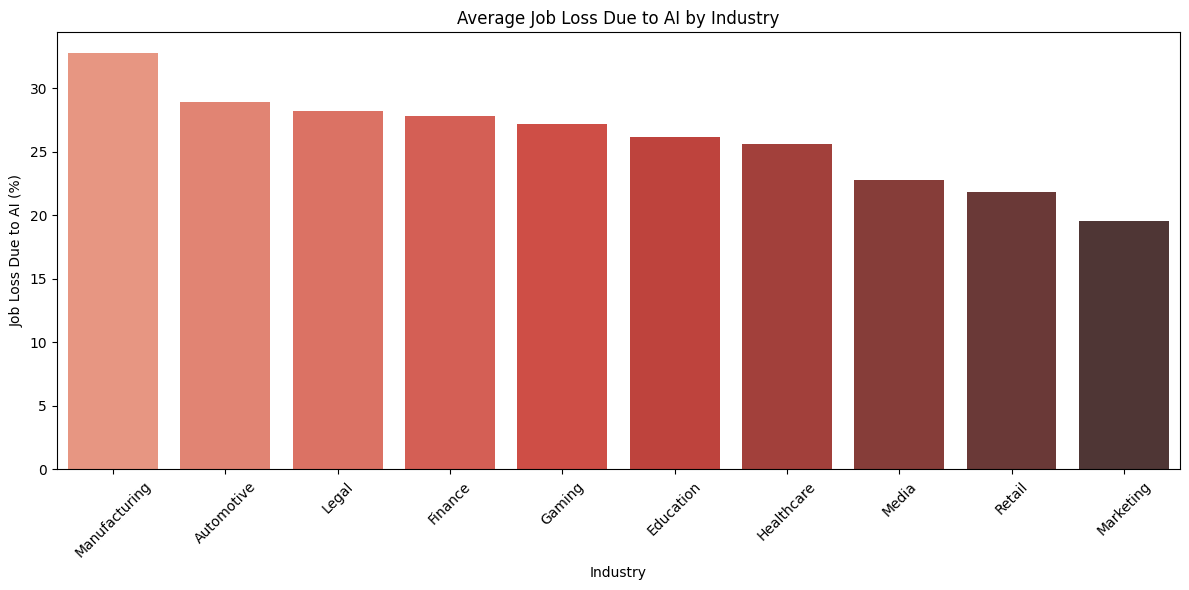

In [9]:
industry_group_sorted = df.groupby('Industry').mean(numeric_only=True).sort_values(by='Job Loss Due to AI (%)', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_group_sorted.index, y=industry_group_sorted['Job Loss Due to AI (%)'], palette='Reds_d')
plt.title('Average Job Loss Due to AI by Industry')
plt.xticks(rotation=45)
plt.tight_layout()

# Yearly trend plot

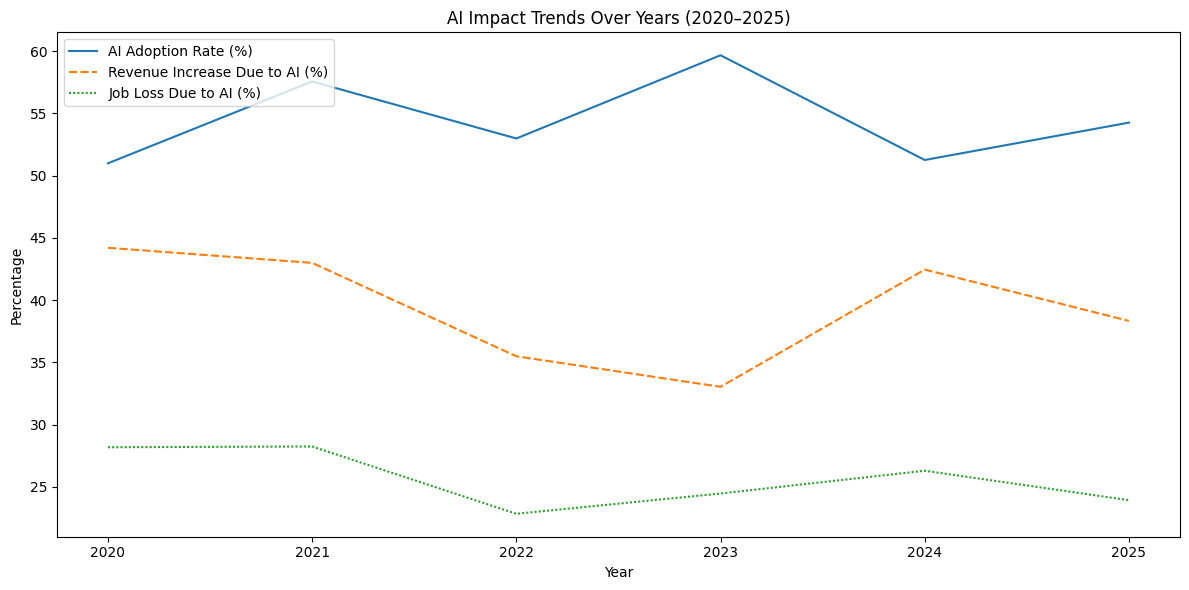

In [10]:
year_group = df.groupby('Year').mean(numeric_only=True)
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_group[['AI Adoption Rate (%)', 'Revenue Increase Due to AI (%)', 'Job Loss Due to AI (%)']])
plt.title('AI Impact Trends Over Years (2020–2025)')
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.tight_layout()

# AI Tool vs Revenue

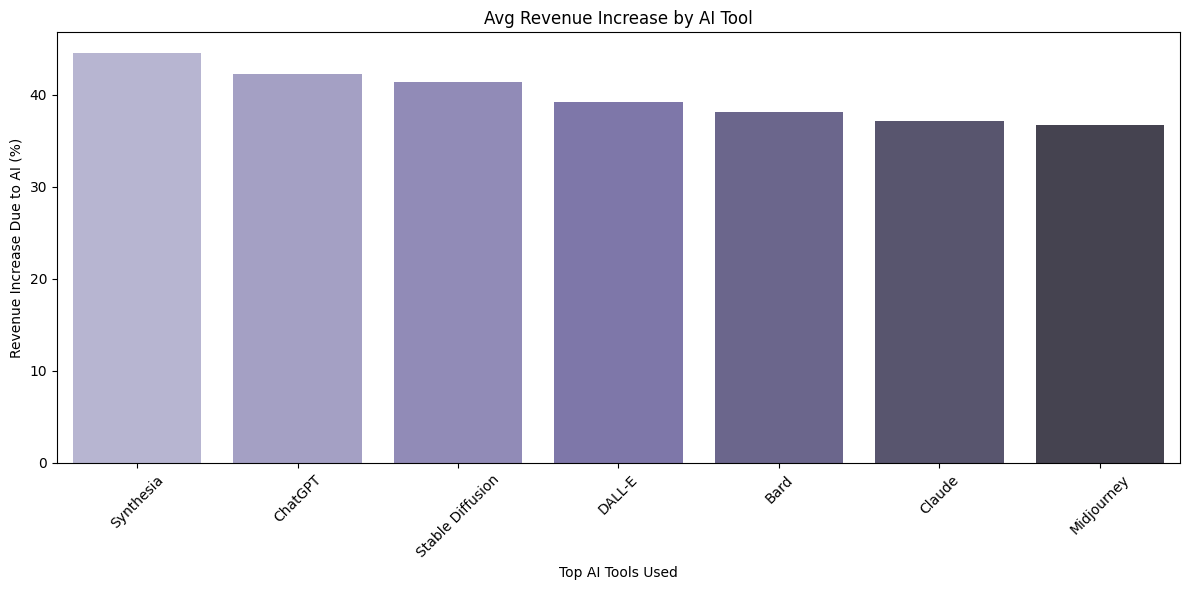

In [11]:
tool_group_sorted = df.groupby('Top AI Tools Used').mean(numeric_only=True).sort_values(by='Revenue Increase Due to AI (%)', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=tool_group_sorted.index, y=tool_group_sorted['Revenue Increase Due to AI (%)'], palette='Purples_d')
plt.title('Avg Revenue Increase by AI Tool')
plt.xticks(rotation=45)
plt.tight_layout()

# Consumer Trust in AI by Country

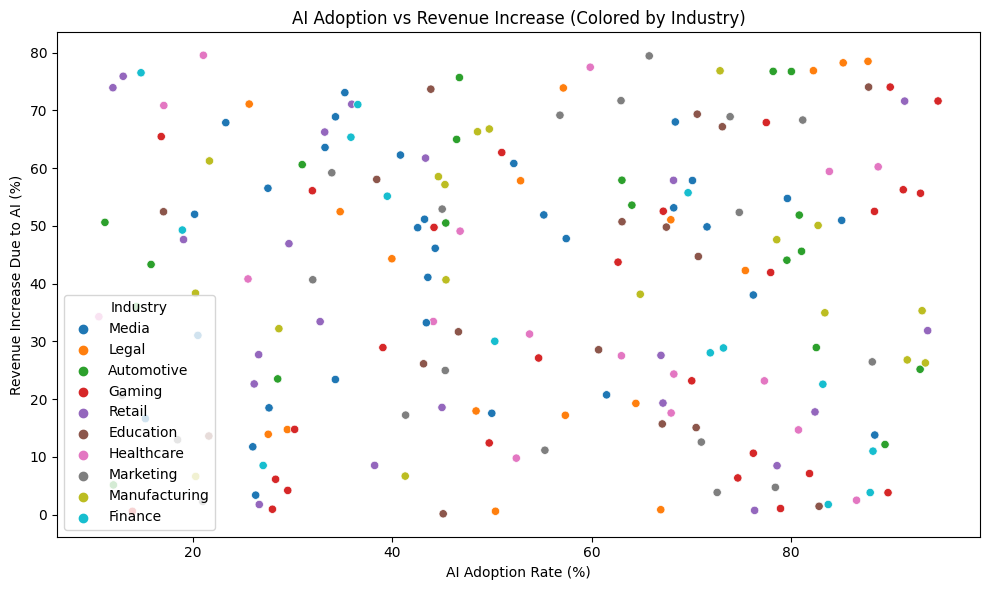

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AI Adoption Rate (%)', y='Revenue Increase Due to AI (%)', hue='Industry')
plt.title('AI Adoption vs Revenue Increase (Colored by Industry)')
plt.tight_layout()

# Scatter Plot: AI Adoption vs Revenue Increase

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=country_group.index, y=country_group['Consumer Trust in AI (%)'], palette='Greens_d')
plt.title('Consumer Trust in AI by Country')
plt.xticks(rotation=45)
plt.tight_layout()

NameError: name 'country_group' is not defined

<Figure size 1200x600 with 0 Axes>

#  Correlation Heatmap

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()

# Pie Chart of Industry Representation

In [ ]:
industry_counts = df['Industry'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Industry Distribution in Dataset')
plt.tight_layout()

# Boxplot: Revenue Increase by Industry

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Industry', y='Revenue Increase Due to AI (%)', palette='Set3')
plt.title('Revenue Increase Due to AI by Industry')
plt.xticks(rotation=45)
plt.tight_layout()

# Violin Plot: AI Adoption Rate by Country

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Country', y='AI Adoption Rate (%)', palette='Set2')
plt.title('AI Adoption Rate Distribution by Country')
plt.xticks(rotation=45)
plt.tight_layout()

# Pairplot of Key Metrics

In [ ]:
sns.pairplot(df[[
    'AI Adoption Rate (%)', 
    'Revenue Increase Due to AI (%)', 
    'Job Loss Due to AI (%)', 
    'Consumer Trust in AI (%)']], 
    kind='scatter', diag_kind='kde', corner=True, palette='husl')
plt.suptitle('Pairplot of AI Impact Metrics', y=1.02)

# Swarmplot: Consumer Trust vs Year (Grouped by Country)

In [ ]:
plt.figure(figsize=(14, 6))
sns.swarmplot(data=df, x='Year', y='Consumer Trust in AI (%)', hue='Country', palette='Dark2')
plt.title('Consumer Trust in AI Over Years by Country')
plt.tight_layout()

## 📌 Conclusion

This exploratory data analysis reveals powerful insights into how AI is reshaping the global landscape between 2020 and 2025:

- 🌍 **Country-wise:** Nations with higher AI adoption tend to also show increased consumer trust and revenue growth. However, some countries show high adoption but low trust, signaling a potential gap in communication or transparency.
  
- 🏭 **Industry-wise:** While most industries are seeing gains in efficiency and revenue, some face significant job displacement risks — especially in traditional media and manufacturing sectors.

- 📈 **Trends over time:** AI adoption is accelerating year-on-year across most regions, with a notable rise in the use of generative and automation tools. However, job loss percentages seem to plateau, hinting at stabilization or adaptation.

- 🛠️ **Tool usage:** Tools like ChatGPT, DALL·E, and industry-specific AI platforms dominate, with noticeable impact on productivity and content generation speed.

- 🧠 **Consumer trust:** Trust levels vary widely — some countries embrace AI as a helpful co-pilot, while others remain skeptical, possibly due to data privacy concerns or cultural factors.

---

✅ This analysis sets the stage for further work:
- Predictive modeling of AI impact
- Sentiment analysis from real-world feedback
- Policy recommendation frameworks based on AI adoption and job shift trends

